## Open data and configuration

In [1]:
import numpy as np
import functions as fc
import fourier_continuation as fc_c
from timeit import default_timer as time
from fatiando.gravmag import polyprism, sphere
from fatiando import mesher, gridder,utils
from fatiando.constants import G, SI2MGAL
from scipy.sparse import diags
from matplotlib import pyplot as plt
from scipy.interpolate import griddata
from scipy import interpolate
from fatiando.vis import mpl
import cPickle as pickle
%matplotlib inline

/home/vanderlei/Documents/fatiando/fatiando/vis/mpl.py:70: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [2]:
with open('synthetic_gz.pickle') as r:
    synthetic_gz = pickle.load(r)
    
xi = synthetic_gz['x']
yi = synthetic_gz['y']
zi = synthetic_gz['z']
dobs = synthetic_gz['gz_med']

shape = (100, 100)
area = [-5000, 5000, -4000, 4000]
R = 1000
xc, yc = -3000, 0

## True data plot

In [3]:
#Projection_model
phi = np.linspace(0, 2.*np.pi, 36)  #36 points
x = xc + R*np.cos(phi)
y = yc + R*np.sin(phi)

x_p = [-3000., -3500, 0, 500, -3000.]
y_p = [-500., 0, 4500, 4000, -500.]

x_p2 = [-3000, -2500, 3500, 3000, -3000.]
y_p2 = [4000, 4500, 0, -500, 4000]

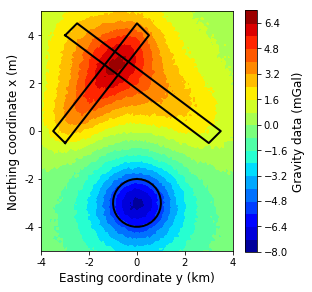

In [4]:
# plot of the vertical component of the gravitational atraction at z=0 
plt.figure(figsize=(4.33,4.33))

plt.plot()
plt.axis('scaled')
#plt.pcolormesh(yi.reshape(shape),xi.reshape(shape),dobs.reshape(shape),
#               cmap='jet')
plt.contourf(yi.reshape(shape),xi.reshape(shape),dobs.reshape(shape),
             22, cmap='jet')
plt.plot(x_p,y_p,color="k", linewidth=2)
plt.plot(x_p2,y_p2,color="k", linewidth=2)
plt.plot(y, x, color="k", linewidth=2)
cb = plt.colorbar(shrink=0.95)
cb.set_label('Gravity data (mGal)', rotation=90, fontsize=12)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Easting coordinate y (km)', fontsize=12)
plt.ylabel('Northing coordinate x (m)', fontsize=12)
mpl.m2km()
#plt.plot(yi, xi, 'ko-', alpha=0.1)
plt.tight_layout(True)
plt.savefig('../manuscript/Fig/Figure5.png', dpi=1200)

## Equivalent Layer Depth

In [5]:
# Equivalent Layer depth
zj = np.ones_like(zi)*300

## Fast Eq. Layer

In [6]:
# Predicted data
itmax = 40
s = time()
rho, gzp = fc.fast_eq(xi,yi,zi,zj,shape,dobs,itmax)
e = time()
tcpu = e - s
print tcpu, 'seconds'

10.7743659019 seconds


In [7]:
delta_gz = gzp-dobs

In [8]:
mean = np.mean(delta_gz)
print mean
std = np.std(delta_gz)
print std

-4.493314434357962e-05
0.09344858625578006


## Fast Eq. Layer BCCB

In [9]:
# Predicted data
itmax = 40
s = time()
rho_c, gzp_bccb = fc.fast_eq_bccb(xi,yi,zi,zj,shape,dobs,itmax)
e = time()
tcpu = e - s
print tcpu, 'seconds'

0.406079769135 seconds


In [10]:
delta_gz_bccb = gzp_bccb-dobs

In [11]:
mean = np.mean(delta_gz)
print mean
std = np.std(delta_gz)
print std

-4.493314434357962e-05
0.09344858625578006


## Mass distribution plot

## Comparison Fast Vs BCCB

In [12]:
delta_gzp = gzp-gzp_bccb

In [13]:
mean = np.mean(delta_gzp)
print mean
std = np.std(delta_gzp)
print std

5.628286465358956e-17
4.6074581719378515e-15


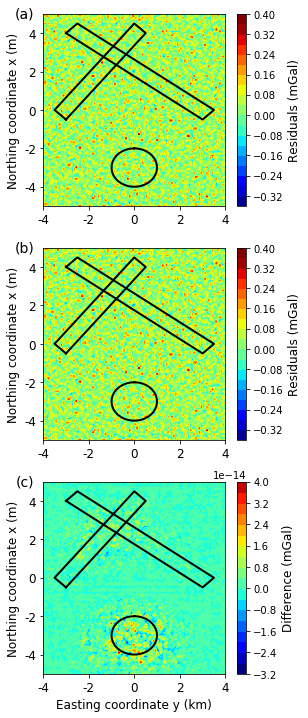

In [21]:
# plot of the vertical component of the gravitational atraction at z=0 
height=14.
width = 6.
height_per_width = height/width
#plt.figure(figsize=(6,16))
plt.figure(figsize=(4.33,4.33*height_per_width))

scale_max = np.max(delta_gz)
scale_min = np.min(delta_gz) 

plt.subplot(311)
#plt.axis('scaled')
plt.title('(a)', y=0.95, x=-0.10, fontsize=14)
#plt.tricontourf(yi,xi,delta_gz,22,cmap='jet', vmin = scale_min, vmax = scale_max)
plt.contourf(yi.reshape(shape),xi.reshape(shape),delta_gz.reshape(shape),
             22,cmap='jet', vmin = scale_min, vmax = scale_max)
plt.plot(x_p,y_p,color="k", linewidth=2)
plt.plot(x_p2,y_p2,color="k", linewidth=2)
plt.plot(y, x, color="k", linewidth=2)
cb = plt.colorbar(shrink=1)
cb.set_label('Residuals (mGal)', rotation=90, fontsize=12)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (m)', fontsize=12)
mpl.m2km()

plt.subplot(312)
#plt.axis('scaled')
plt.title('(b)', y=0.95, x=-0.10, fontsize=14)
#plt.tricontourf(yi,xi,delta_gz_bccb,22,cmap='jet', vmin = scale_min, vmax = scale_max)
plt.contourf(yi.reshape(shape),xi.reshape(shape),delta_gz_bccb.reshape(shape),
             22,cmap='jet', vmin = scale_min, vmax = scale_max)
plt.plot(x_p,y_p,color="k", linewidth=2)
plt.plot(x_p2,y_p2,color="k", linewidth=2)
plt.plot(y, x, color="k", linewidth=2)
cb = plt.colorbar(shrink=1)
cb.set_label('Residuals (mGal)', rotation=90, fontsize=12)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.xlabel('Easting coordinate y (km)', fontsize=14)
plt.ylabel('Northing coordinate x (m)', fontsize=12)
mpl.m2km()

plt.subplot(313)
#plt.axis('scaled')
plt.title('(c)', y=0.95, x=-0.10, fontsize=14)
#plt.tricontourf(yi,xi,delta_gzp,22,cmap='jet', vmin = np.min(delta_gzp), vmax = np.max(delta_gzp))
plt.contourf(yi.reshape(shape),xi.reshape(shape),delta_gzp.reshape(shape),
             22,cmap='jet', vmin = np.min(delta_gzp), vmax = np.max(delta_gzp))
plt.plot(x_p,y_p,color="k", linewidth=2)
plt.plot(x_p2,y_p2,color="k", linewidth=2)
plt.plot(y, x, color="k", linewidth=2)
cb = plt.colorbar(shrink=1)
cb.set_label('Difference (mGal)', rotation=90, fontsize=12)
plt.xlim(np.min(yi),np.max(yi))
plt.ylim(np.min(xi),np.max(xi))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Easting coordinate y (km)', fontsize=12)
plt.ylabel('Northing coordinate x (m)', fontsize=12)
mpl.m2km()

plt.tight_layout()
#plt.savefig('../manuscript/Fig/deltas_gz_med.png', dpi=300)
plt.savefig('../manuscript/Fig/Figure6.png', dpi=900)